In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")

In [66]:
df=pd.read_csv('mushroom_project.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [67]:
df.shape

(8124, 23)

In [68]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["class"]=LE.fit_transform(df["class"])
df["cap-shape"]=LE.fit_transform(df["cap-shape"])
df["cap-surface"]=LE.fit_transform(df["cap-surface"])
df["cap-color"]=LE.fit_transform(df["cap-color"])
df["bruises"]=LE.fit_transform(df["bruises"])
df["odor"]=LE.fit_transform(df["odor"])
df["gill-attachment"]=LE.fit_transform(df["gill-attachment"])
df["gill-spacing"]=LE.fit_transform(df["gill-spacing"])
df["gill-size"]=LE.fit_transform(df["gill-size"])
df["gill-color"]=LE.fit_transform(df["gill-color"])

df["stalk-shape"]=LE.fit_transform(df["stalk-shape"])
df["stalk-root"]=LE.fit_transform(df["stalk-root"])
df["stalk-surface-above-ring"]=LE.fit_transform(df["stalk-surface-above-ring"])
df["stalk-surface-below-ring"]=LE.fit_transform(df["stalk-surface-below-ring"])
df["stalk-color-above-ring"]=LE.fit_transform(df["stalk-color-above-ring"])
df["stalk-color-below-ring"]=LE.fit_transform(df["stalk-color-below-ring"])
df["veil-type"]=LE.fit_transform(df["veil-type"])
df["veil-color"]=LE.fit_transform(df["veil-color"])

df["ring-number"]=LE.fit_transform(df["ring-number"])
df["ring-type"]=LE.fit_transform(df["ring-type"])
df["spore-print-color"]=LE.fit_transform(df["spore-print-color"])
df["population"]=LE.fit_transform(df["population"])
df["habitat"]=LE.fit_transform(df["habitat"])

In [70]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [71]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [72]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

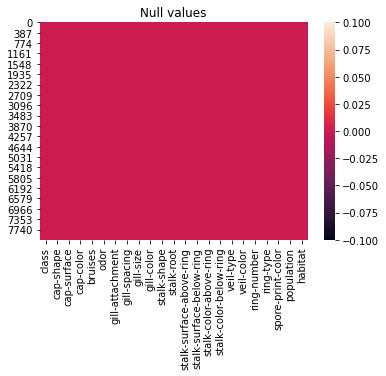

In [73]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

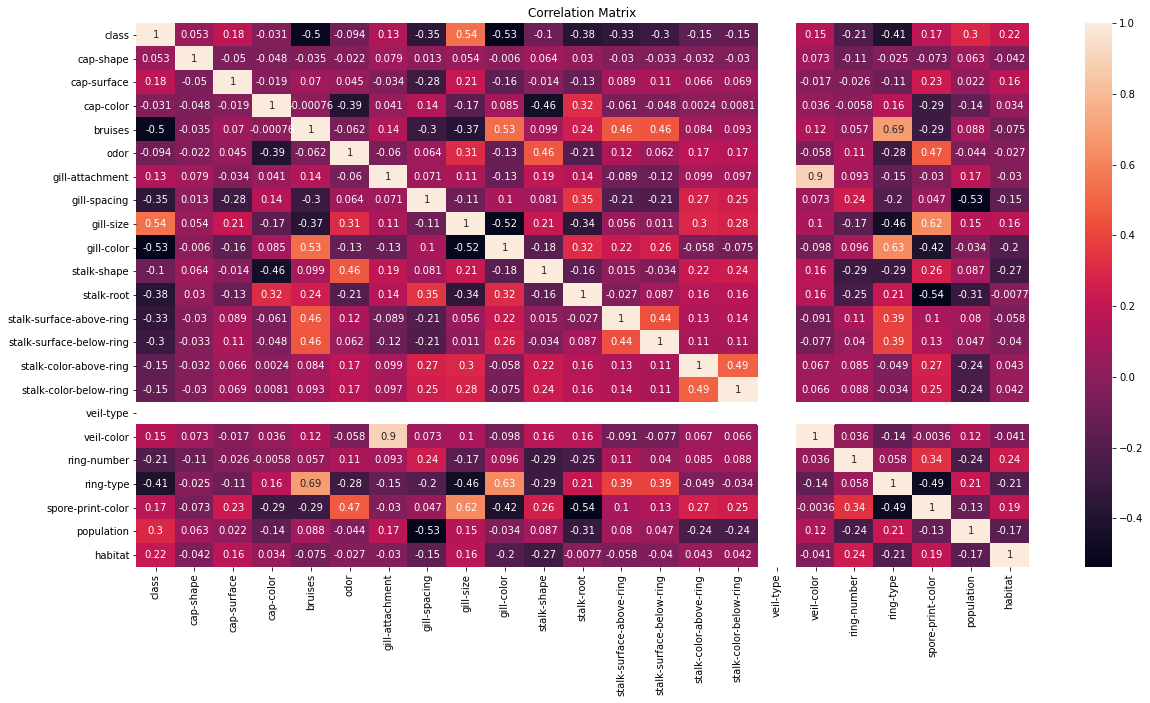

In [74]:
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [75]:
corr_matrix=df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

There are round 13 variable who has less then 0.01 correlation value with target varibale class.

In [76]:
x= df.drop("class",axis=1)
y= df["class"]

In [77]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [78]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)


In [79]:
df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-type                   0.000000
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

In [80]:
x=df_new

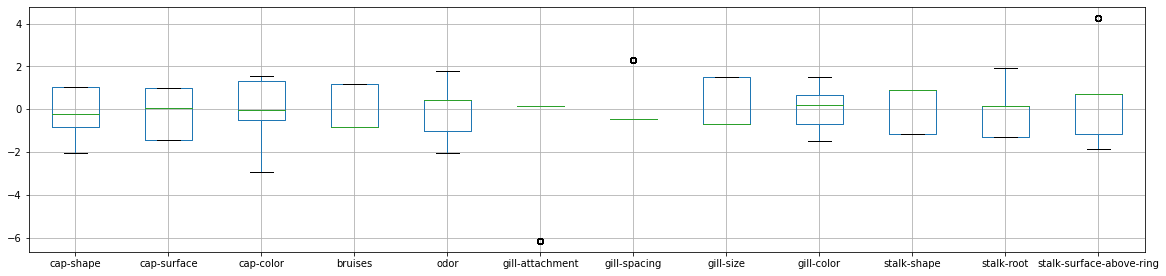

In [81]:
x.iloc[:,0:12].boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

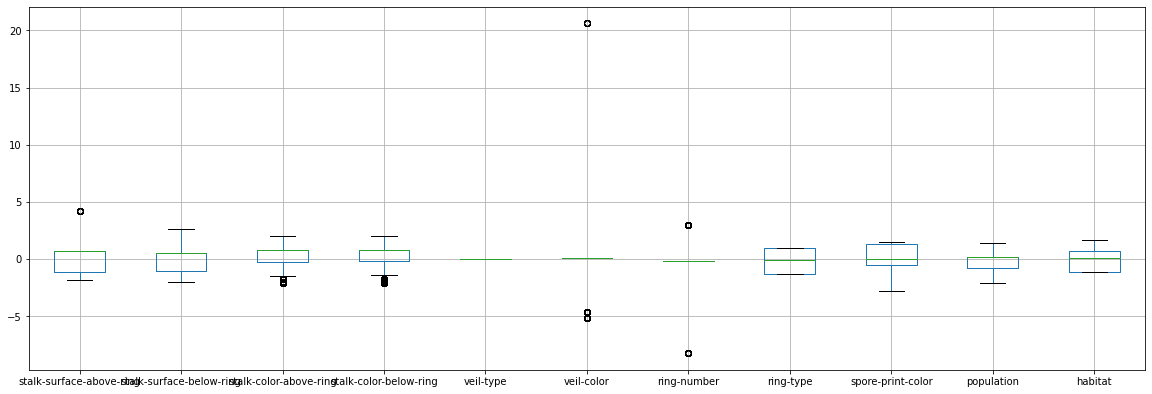

In [82]:
x.iloc[:,11:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [83]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(x))
print(z)

[[1.03577474 0.05017017 0.02673986 ... 0.53714841 0.80052972 1.51548871]
 [1.03577474 0.05017017 1.56319371 ... 0.01906382 1.47485647 0.11634762]
 [2.02788189 0.05017017 1.30592999 ... 0.01906382 1.47485647 1.06633941]
 ...
 [0.85127533 0.05017017 0.02673986 ... 2.80619461 1.89857525 0.70247929]
 [0.23408877 0.99864626 0.02673986 ... 1.29862534 0.15412432 0.70247929]
 [1.03577474 0.05017017 0.02673986 ... 0.4401869  1.89857525 0.70247929]]


In [84]:
threshold = 3
print(np.where(z > 3))

(array([6038, 6038, 6040, 6040, 6375, 6375, 6415, 6424, 6424, 6434, 6434,
       6558, 6558, 6663, 6663, 6668, 6668, 6763, 6763, 6849, 6849, 6855,
       6900, 6900, 6905, 6905, 6910, 6910, 6912, 6912, 6927, 6927, 6945,
       6945, 6967, 6970, 6984, 6989, 6989, 6991, 6994, 6994, 6999, 6999,
       7025, 7025, 7026, 7026, 7033, 7033, 7034, 7036, 7036, 7037, 7037,
       7041, 7041, 7051, 7051, 7054, 7054, 7065, 7065, 7079, 7079, 7090,
       7090, 7091, 7100, 7100, 7111, 7111, 7128, 7128, 7133, 7133, 7135,
       7135, 7146, 7166, 7173, 7173, 7176, 7176, 7182, 7182, 7188, 7188,
       7195, 7205, 7205, 7221, 7221, 7228, 7228, 7230, 7233, 7233, 7235,
       7235, 7239, 7239, 7244, 7244, 7246, 7246, 7251, 7251, 7253, 7253,
       7265, 7265, 7281, 7281, 7285, 7285, 7290, 7290, 7292, 7295, 7295,
       7299, 7299, 7306, 7306, 7323, 7325, 7325, 7327, 7327, 7336, 7342,
       7352, 7352, 7366, 7366, 7367, 7367, 7368, 7368, 7375, 7375, 7376,
       7376, 7386, 7388, 7388, 7401, 7401, 7405, 7

In [85]:
print(z[6038] [5])

6.138869137366776


In [87]:
x=x[(z<6).all(axis=1)]

ValueError: Item wrong length 8124 instead of 0.

In [96]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(0,8124):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        print("Best accuracy is",maxAccu,"on Random State",maxRS)
    

ValueError: Found input variables with inconsistent numbers of samples: [0, 8124]